In [1]:
import utils
from hopfield import HopfieldNeuralNetwork
import numpy as np
import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

(6, 6)
Min Vertex Cover Weight: 8.0
Finished in 4.17 seconds


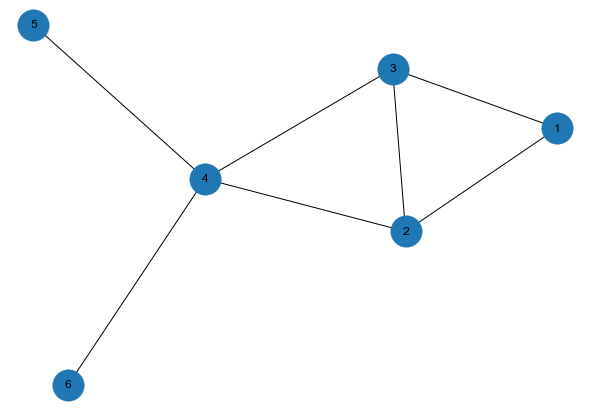

In [2]:
mwvc = utils.MinWeightedVertexCover()

# Edge weights
G = np.array([[0,1,1,0,0,0],
              [1,0,1,1,0,0],
              [1,1,0,1,0,0],
              [0,1,1,0,1,1],
              [0,0,0,1,0,0],
              [0,0,0,1,0,0]])

# utils.plot_graph(G, {i: i+1 for i in range(len(G))})

# Node weights
Gn = np.array([2, 3, 1, 5, 3, 3])

print(G.shape)

W = -len(Gn) * abs(Gn.max()) * G
Wn = -Gn

ones = np.ones(W.shape[0])

# Bias vector in terms of node weights and edge weights
b = 4 * np.array(Wn) - W.T @ ones

hnn = HopfieldNeuralNetwork(weights=W, bias=b, mode='Baseline')
n_steps = 500
n_epochs = 100

# alpha_evol = np.linspace(0, 1, n_steps)
alpha_evol = np.logspace(5, -5, n_steps)
energies = np.zeros((n_epochs, n_steps))
idx_state = utils.PermutationStates(hnn.n_neurons)


def find_vtx_cover(hnn, n_steps, epoch, batch_size=0):
  '''`batch_size` lies in [0, 1]. If `batch_size` is 0, a single state of x is updated
  at a time. If `batch_size` is 1, all states of x are updated at a time.'''
  x = np.random.choice([-1, 1], size=hnn.n_neurons)
  for i, alpha in zip(range(n_steps), alpha_evol):
    if batch_size == 0: idx = idx_state.next()
    else: idx = random.sample(range(hnn.n_neurons), int(np.ceil(batch_size*hnn.n_neurons)))
    x[idx] = hnn.predict(x, alpha=alpha, indices=idx)
    energies[epoch][i] = mwvc.energy(x, hnn.W, hnn.b)
  vtx_cov_energy = mwvc.energy(x, hnn.W, hnn.b)
  return vtx_cov_energy, x

start = time.perf_counter()
best_vtx_cov_energy = np.inf
min_vtx_cover = None
for e in range(n_epochs):
  vtx_cov_energy, y = find_vtx_cover(hnn, n_steps, e)
  # print(f'Epoch {e+1}: {vtx_cov_energy}, {y}')
  if vtx_cov_energy < best_vtx_cov_energy:
    best_vtx_cov_energy = vtx_cov_energy
    min_vtx_cover = y

print(f'Min Vertex Cover Weight: {best_vtx_cov_energy}')
print(f'Finished in {time.perf_counter()-start:.2f} seconds')

In [3]:
y = np.array([1, 1, 1, 1, 1, 1])
mwvc.energy(y, hnn.W, hnn.b)

17.0

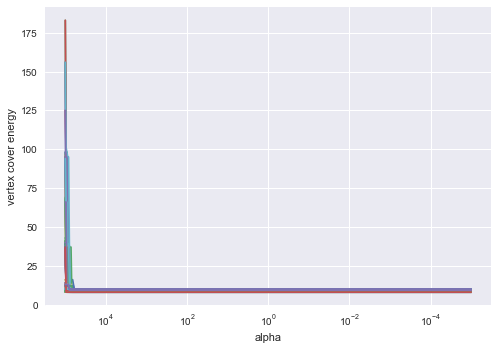

In [4]:
for e in range(n_epochs): plt.plot(alpha_evol, energies[e])
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('vertex cover energy')
plt.savefig('vtx_cov_energies.png')

In [5]:
min_vtx_cover

array([ 1, -1,  1,  1, -1, -1])

In [6]:
# Verifying the result by brute force
import itertools

ans = np.inf
y_ans = None
for y in np.array(list(map(list, itertools.product([-1, 1], repeat=6)))):
  if ans > mwvc.energy(y, W, b):
    ans = mwvc.energy(y, W, b)
    y_ans = y
print(ans, y_ans)

8.0 [ 1 -1  1  1 -1 -1]


Worst vertex cover energy: 10.0


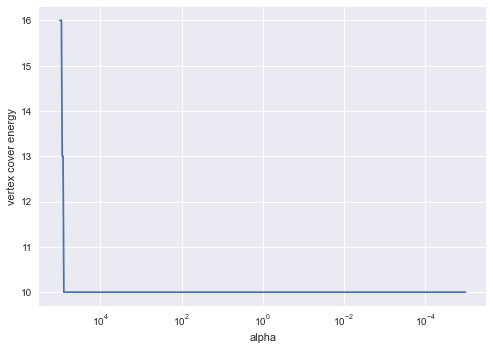

In [7]:
i = np.argmax(energies[:,-1])
print(f'Worst vertex cover energy: {energies[i][-1]}')
plt.plot(alpha_evol, energies[i])
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('vertex cover energy')
plt.show()

Best vertex cover energy: 8.0


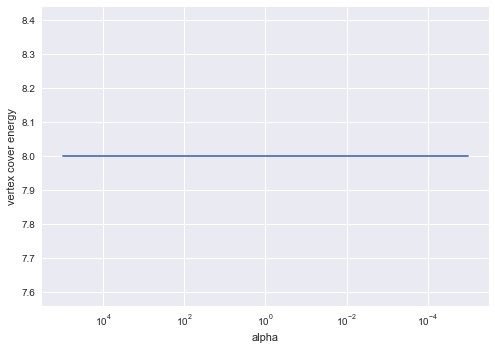

In [8]:
i = np.argmin(energies[:,-1])
print(f'Best vertex cover energy: {energies[i][-1]}')
plt.plot(alpha_evol, energies[i])
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('vertex cover energy')
plt.show()